## Dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/tips.csv')

In [5]:
df.head()

,Total_bill,Tip,Sex,Smoker,Day,Time,Size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Total_bill  244 non-null    float64
 1   Tip         244 non-null    float64
 2   Sex         244 non-null    object 
 3   Smoker      244 non-null    object 
 4   Day         244 non-null    object 
 5   Time        244 non-null    object 
 6   Size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## Bill amount and tip

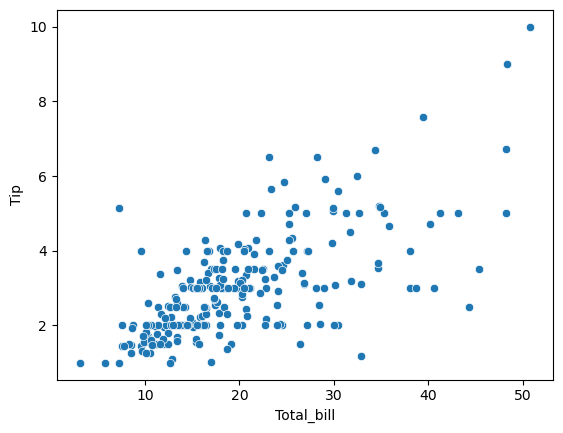

In [7]:
tip_value = sns.scatterplot(x = 'Total_bill', y = 'Tip', data = df)

#### Visually, the tip amount increases as the bill amount increases

In [8]:
df.shape[0]

244

## Percentage field

In [9]:
df.head(1)

,Total_bill,Tip,Sex,Smoker,Day,Time,Size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [10]:
df['perc'] = df['Tip'] / df['Total_bill']

In [11]:
df.head()

,Total_bill,Tip,Sex,Smoker,Day,Time,Size,perc
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [12]:
df['perc'] = df['perc'].round(2)

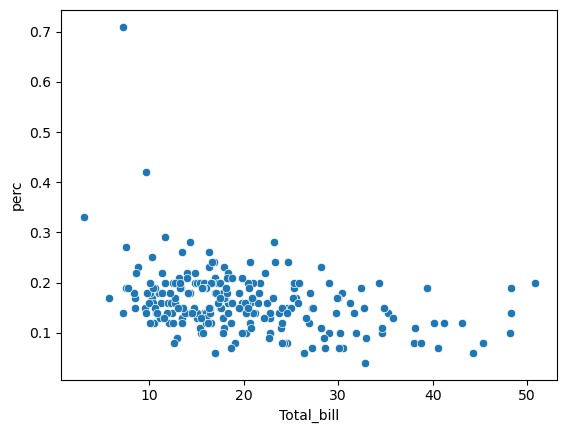

In [13]:
perc_total_bill = sns.scatterplot(x = 'Total_bill', y = 'perc', data = df)

#### Visually, the bill amount is not proportional to the tip amount

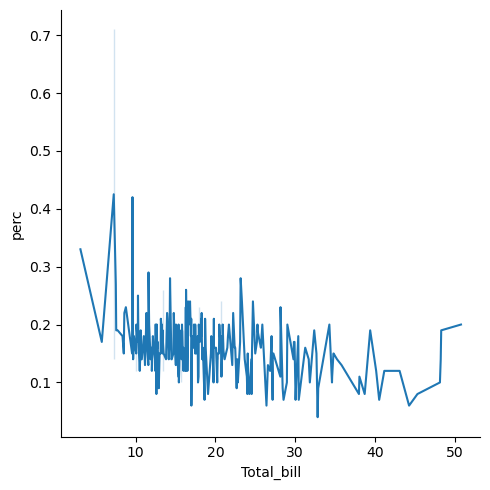

In [14]:
perc_total_bill_line = sns.relplot(x = 'Total_bill', y = 'perc', kind = 'line', data = df)

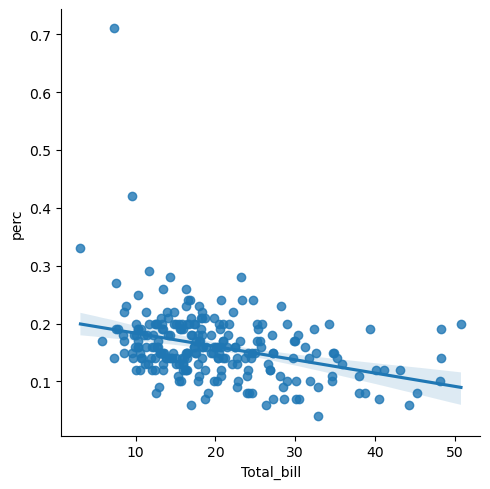

In [15]:
sns.lmplot(x = 'Total_bill', y = 'perc', data = df)

In [16]:
df.head()

,Total_bill,Tip,Sex,Smoker,Day,Time,Size,perc
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17
3,23.68,3.31,Male,No,Sun,Dinner,2,0.14
4,24.59,3.61,Female,No,Sun,Dinner,4,0.15


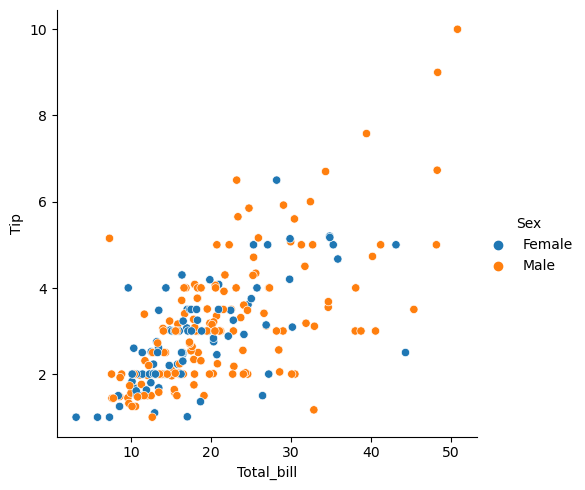

In [17]:
sns.relplot(x = 'Total_bill', y = 'Tip', hue = 'Sex', data = df)

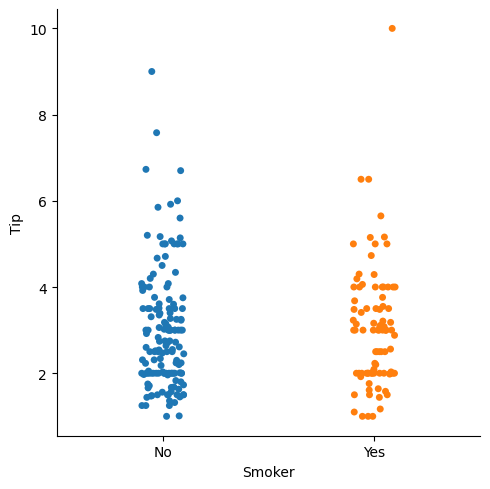

In [18]:
sns.catplot(x = 'Smoker', y = 'Tip', data = df)

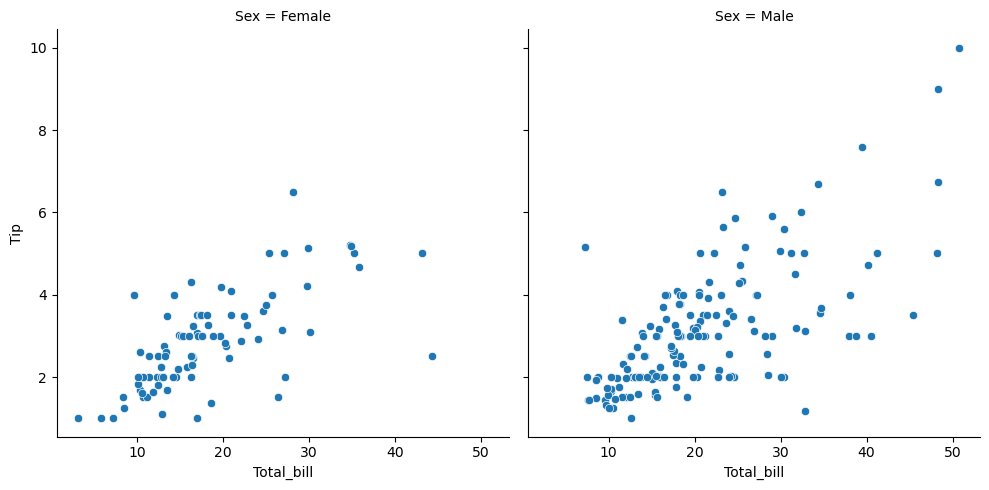

In [19]:
sns.relplot(x = 'Total_bill', y = 'Tip', col = 'Sex', data = df)

#### Visually, the distribution shows little difference

## Smoker

<Figure size 1000x500 with 0 Axes>

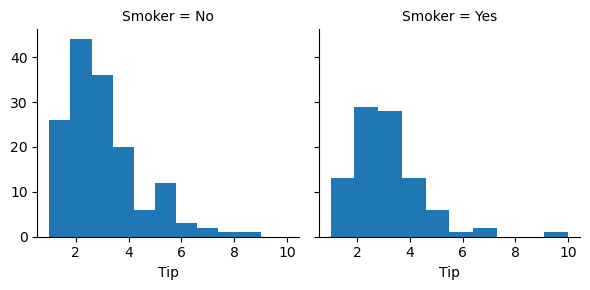

In [20]:
plt.figure(figsize = (10, 5))
graph = sns.FacetGrid(df, col = 'Smoker', col_wrap = 2)
graph.map(plt.hist, 'Tip', bins = 10)

## Day

In [21]:
df.head()

,Total_bill,Tip,Sex,Smoker,Day,Time,Size,perc
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17
3,23.68,3.31,Male,No,Sun,Dinner,2,0.14
4,24.59,3.61,Female,No,Sun,Dinner,4,0.15


In [22]:
df['Day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

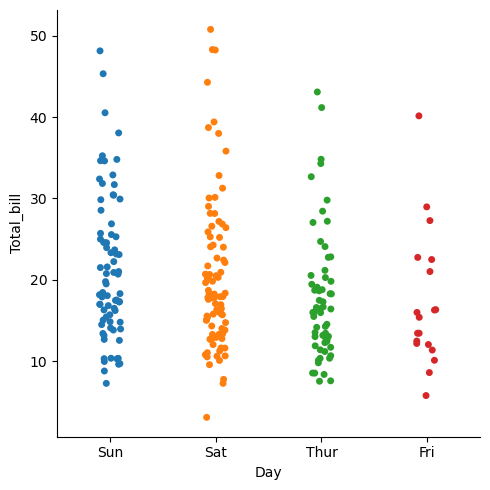

In [23]:
sns.catplot(x = 'Day', y = 'Total_bill', data = df)

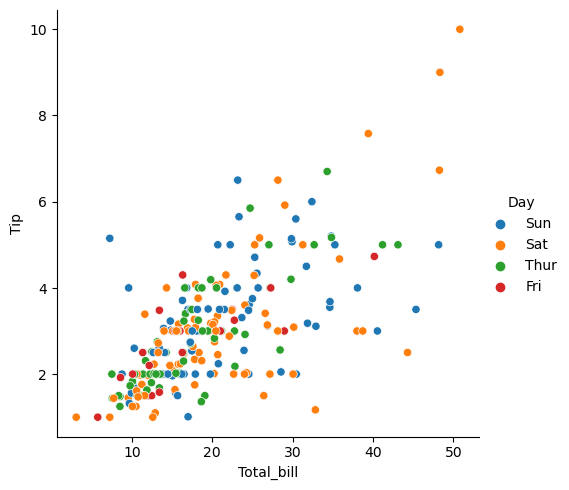

In [24]:
sns.relplot(x = 'Total_bill', y = 'Tip', hue = 'Day', data = df)

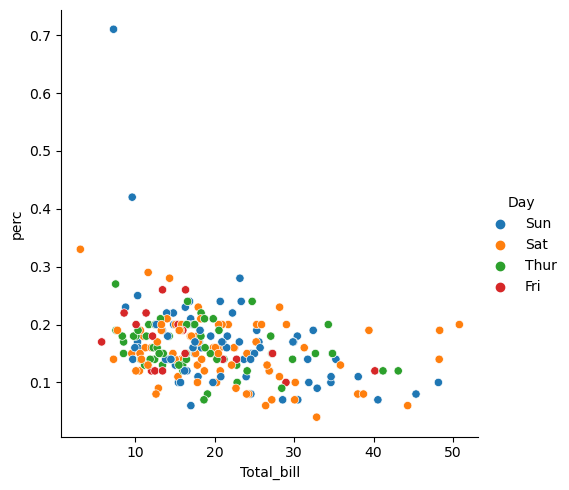

In [25]:
sns.relplot(x = 'Total_bill', y = 'perc', hue = 'Day', data = df)

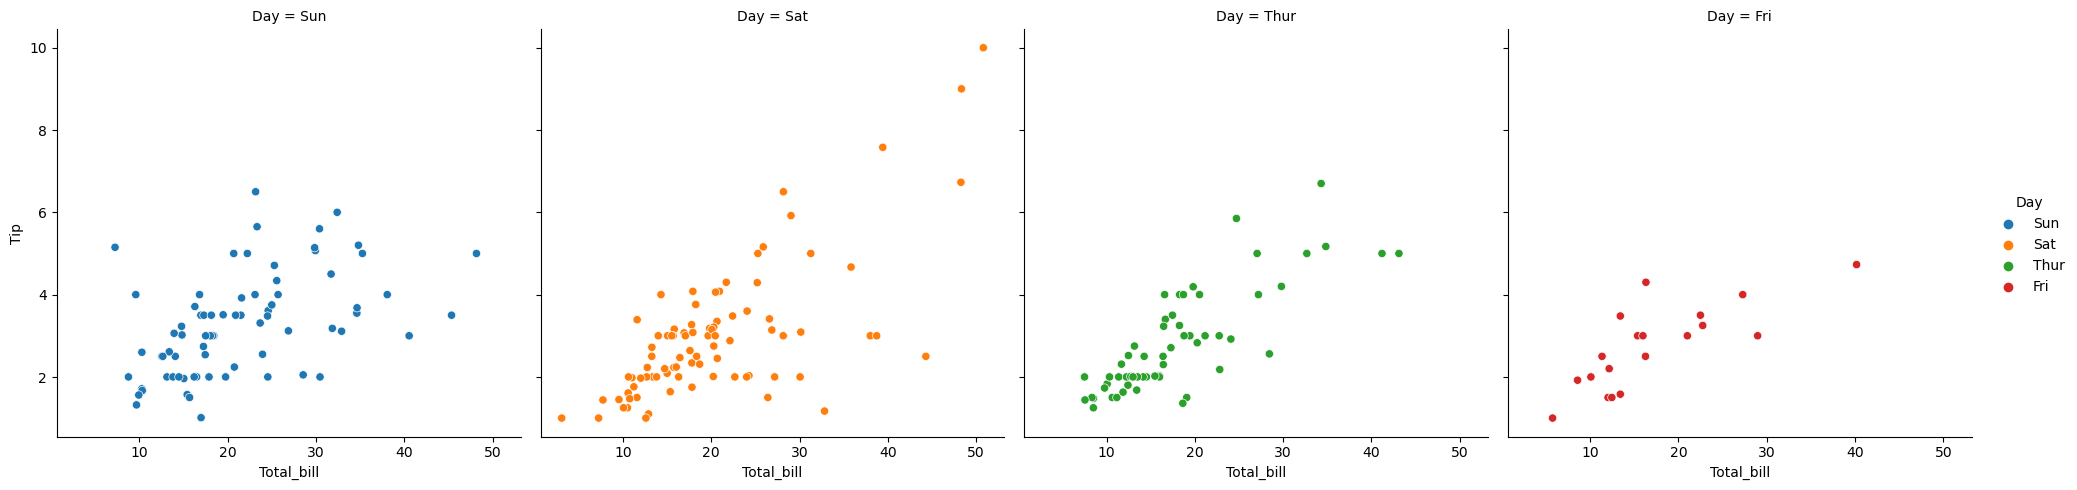

In [26]:
sns.relplot(x = 'Total_bill', y = 'Tip', hue = 'Day', col = 'Day', data = df)

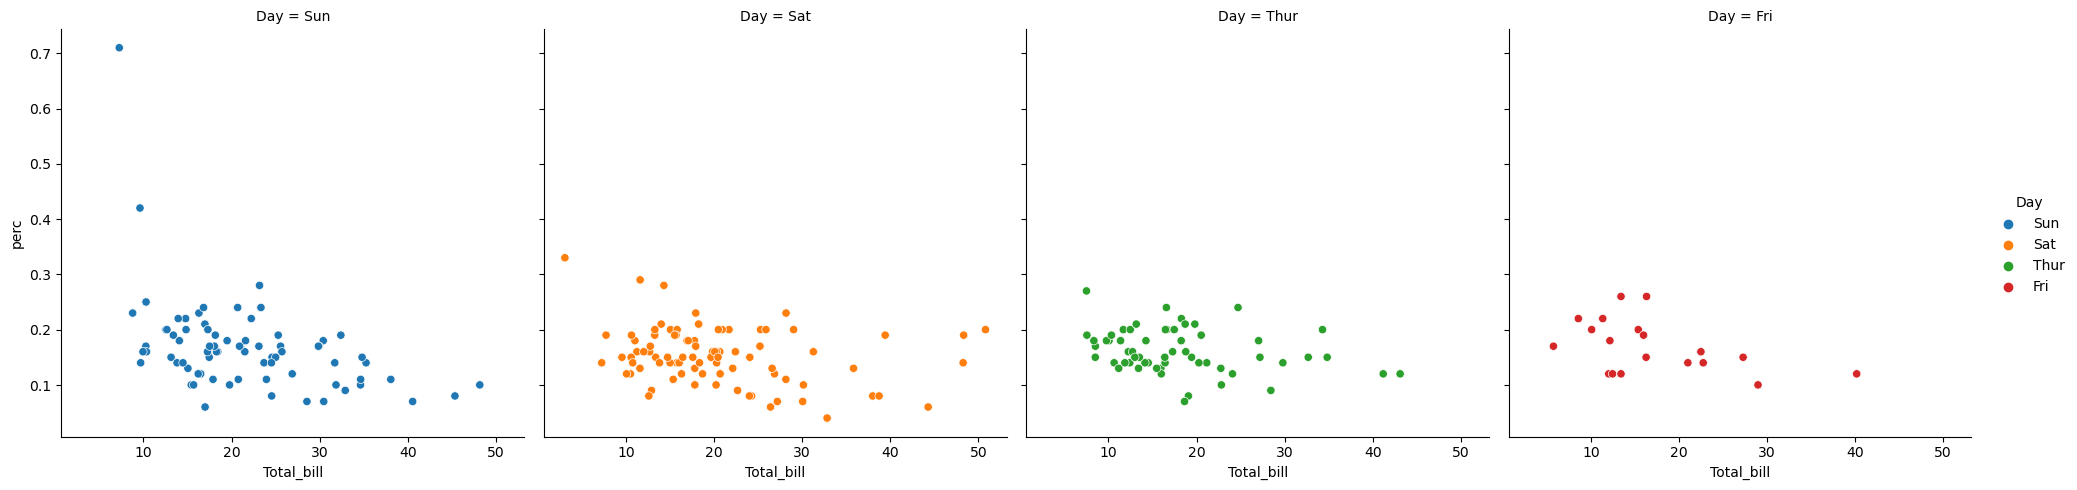

In [27]:
sns.relplot(x = 'Total_bill', y = 'perc', hue = 'Day', col = 'Day', data = df)

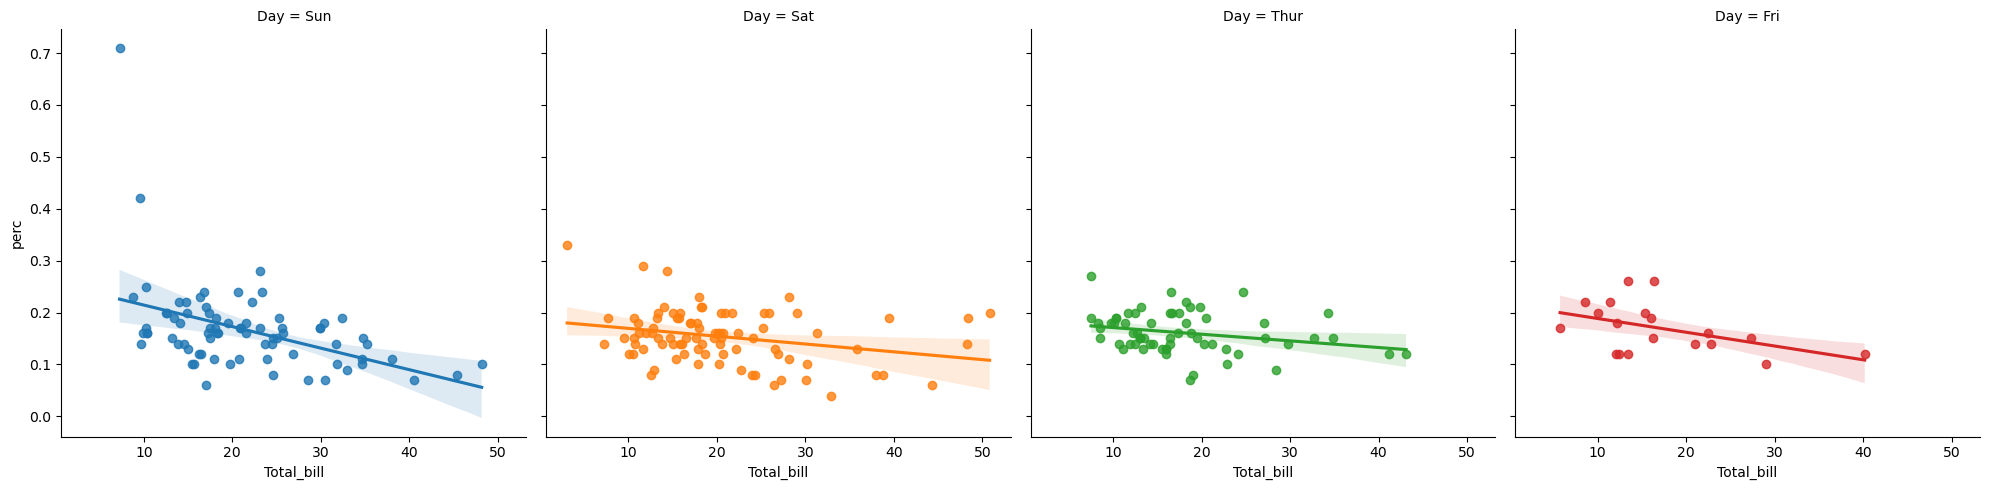

In [28]:
sns.lmplot(x = 'Total_bill', y = 'perc', hue = 'Day', col = 'Day', data = df)

In [29]:
average_geral_tips = df.Tip.mean()

In [30]:
print('Average geral tips: {}'.format(average_geral_tips))

Average geral tips: 2.9982786885245902


In [31]:
df.groupby(['Day']).mean()[['Total_bill', 'Tip', 'perc']]

,Total_bill,Tip,perc
Day,,,
Fri,17.151579,2.734737,0.169474
Sat,20.441379,2.993103,0.153678
Sun,21.410000,3.255132,0.166974
Thur,17.682742,2.771452,0.161129


In [32]:
print('Frequency of days:')
df['Day'].value_counts()

Frequency of days:


Sat     87
Sun     76
Thur    62
Fri     19
Name: Day, dtype: int64

## Hypothesis test

#### Account value distribution is equal on Saturday and Sunday
#### Account value distribution is not equal on Saturday and Sunday

In [33]:
sun_total_bill_value = df.query("Day == 'Sun'").Total_bill

In [34]:
sat_total_bill_value = df.query("Day == 'Sat'").Total_bill

In [35]:
from scipy.stats import ranksums

r2 = ranksums(sun_total_bill_value, sat_total_bill_value)
print(f'p-value: {r2.pvalue}')

p-value: 0.3576728477868443


#### The distribution of the account value is equal on Saturday and Sunday

## Time

In [36]:
df.head()

,Total_bill,Tip,Sex,Smoker,Day,Time,Size,perc
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17
3,23.68,3.31,Male,No,Sun,Dinner,2,0.14
4,24.59,3.61,Female,No,Sun,Dinner,4,0.15


In [37]:
df.Time.unique()

array(['Dinner', 'Lunch'], dtype=object)

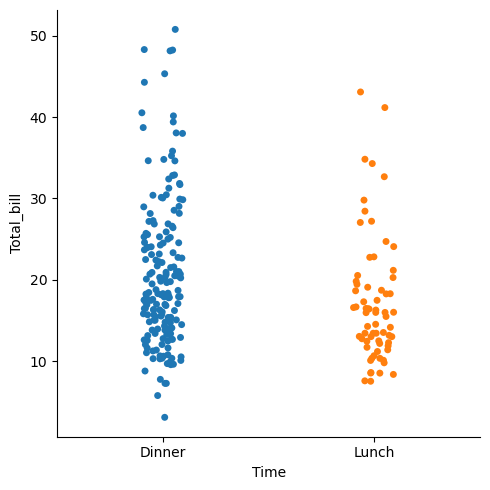

In [38]:
sns.catplot(x = 'Time', y = 'Total_bill', data = df)

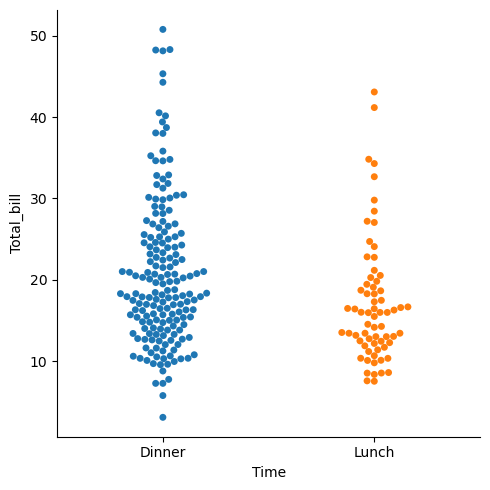

In [39]:
sns.catplot(x = 'Time', y = 'Total_bill', kind = 'swarm', data = df)

<AxesSubplot:xlabel='Time', ylabel='Total_bill'>

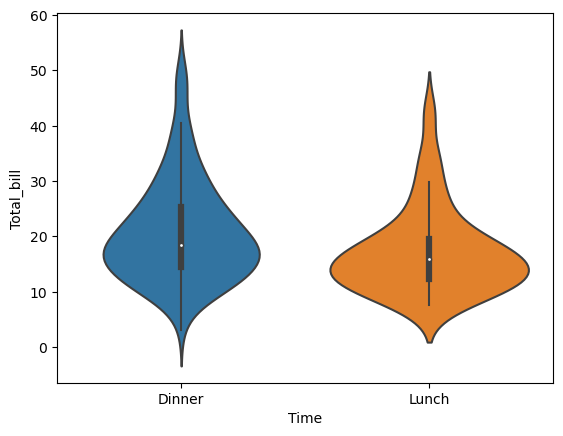

In [40]:
sns.violinplot(x = 'Time', y = 'Total_bill', data = df)

<AxesSubplot:xlabel='Time', ylabel='Total_bill'>

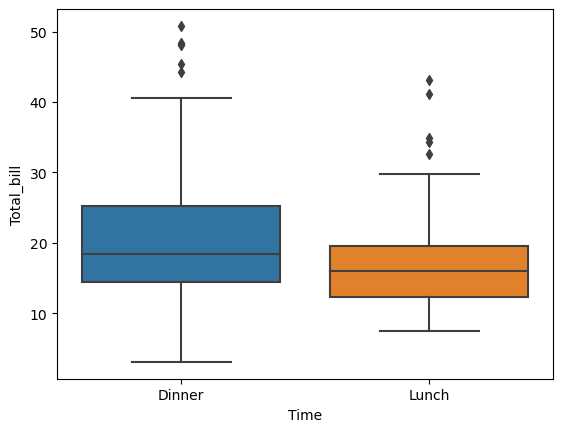

In [41]:
sns.boxplot(x = 'Time', y = 'Total_bill', data = df)

In [42]:
lunch = df.query("Time == 'Lunch'").Total_bill

C:\Users\Micaeld\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_bill', ylabel='Density'>

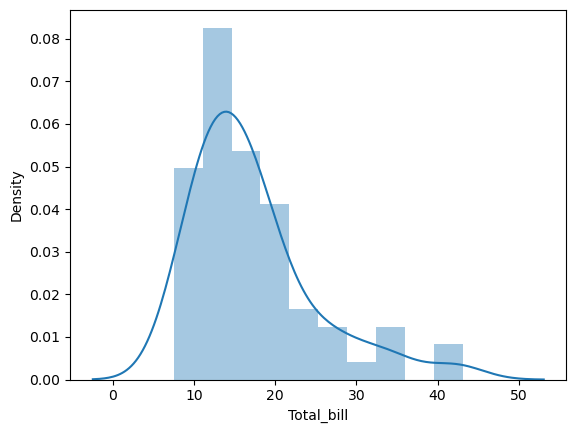

In [43]:
sns.distplot(lunch)

C:\Users\Micaeld\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_bill'>

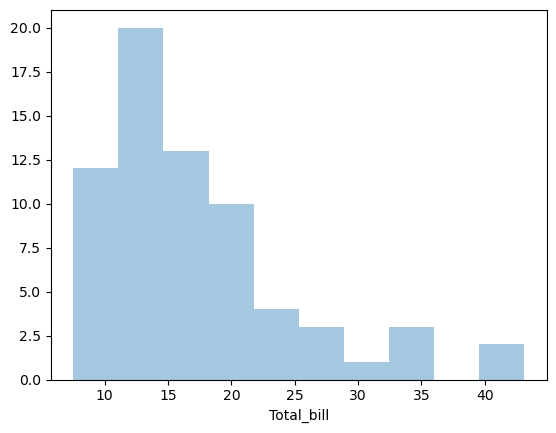

In [44]:
sns.distplot(lunch, kde = False)

In [45]:
dinner = df.query("Time == 'Dinner'").Total_bill

<AxesSubplot:xlabel='Total_bill', ylabel='Density'>

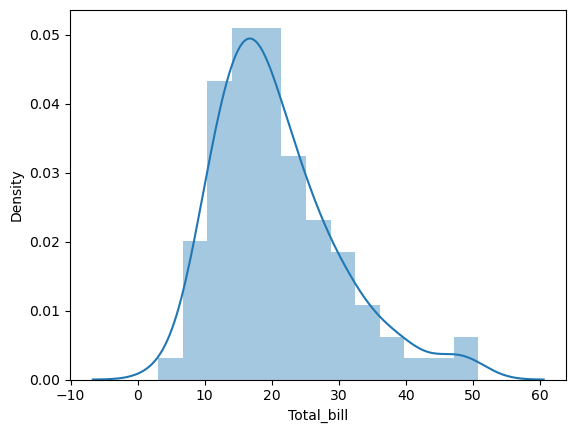

In [46]:
sns.distplot(dinner)

C:\Users\Micaeld\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_bill'>

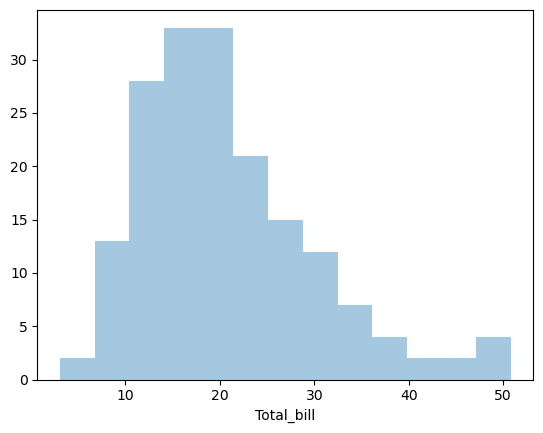

In [47]:
sns.distplot(dinner, kde = False)

In [48]:
df.groupby(['Time']).mean()[['Total_bill', 'Tip', 'perc']]

,Total_bill,Tip,perc
Time,,,
Dinner,20.797159,3.102670,0.159773
Lunch,17.168676,2.728088,0.163971


## Hypothesis test

#### Distribution of bill amount is equal for dinner and lunch

#### Distribution of bill amount is not equal for dinner and lunch

In [49]:
r2 = ranksums(dinner, lunch)

In [50]:
print(f'p-value: {r2.pvalue}')

p-value: 0.0011791039723641672


#### Distribution of bill amount is not equal for dinner and lunch

## Hypothesis test II

#### The distribution of the tip fee is the same for dinner and lunch

#### The distribution of the tip fee is not equal for dinner and lunch

In [51]:
lunch_perc = df.query("Time == 'Lunch'").perc

In [52]:
dinner_perc = df.query("Time == 'Dinner'").perc

In [53]:
r3 = ranksums(lunch_perc, dinner_perc)

In [54]:
print(f'p-value: {r3.pvalue}')

p-value: 0.2602493995587126


#### The distribution of the tip fee is the same for dinner and lunch

_